In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = r"D:\ml-algorithms\datasets\autos_dataset.csv"

In [5]:
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.shape

(205, 26)

In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### There are Null values preasent in the dataset

In [10]:
(df == '?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### replace the `?` with NaN values and then find the percentage of missing values
 - if missing value is >=25 % it is better to drop such columsn 

In [11]:
df.replace('?',np.nan,inplace=True)
for col in df.columns:
    # Try to convert in numeric features
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [12]:
#  Check the colums are converted into numeric
# df.info()

In [13]:
### Findout missing value percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

In [14]:
missing_info = pd.DataFrame({
    'Missing_Values': missing_count,
    'Percentage':missing_percent
})
print(missing_info[missing_info['Missing_Values']>0])

                   Missing_Values  Percentage
normalized-losses              41    20.00000
num-of-doors                    2     0.97561
bore                            4     1.95122
stroke                          4     1.95122
horsepower                      2     0.97561
peak-rpm                        2     0.97561
price                           4     1.95122


In [15]:
### Check for skewness of this features 
missing_cols = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [16]:
### Calculate skewness
for col in missing_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        skew_val = round(df[col].skew(),2)
        print(f"Skewness of  {col}: {skew_val:.2f}")
    else:
        print(f"Skipping {col}: Not Numeric column")

Skewness of  normalized-losses: 0.77
Skipping num-of-doors: Not Numeric column
Skewness of  bore: 0.02
Skewness of  stroke: -0.68
Skewness of  horsepower: 1.39
Skewness of  peak-rpm: 0.07
Skewness of  price: 1.81


- Remove rows where the target column (price) is missing. Do not impute these values. This ensures your model is trained only on real, observed outcomes and maintains the integrity of your analysis.

In [17]:
## Remove missing values from `price`
df.dropna(subset=['price'],inplace=True)

In [18]:
### fill the missing values in categorical data
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace=True)

In [19]:
### Fill the missing values in contineous features
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True) # 0.77 skewness

In [20]:
df['stroke'].fillna(df['stroke'].median(),inplace=True) # -0.68 skewness

In [21]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True) # 1.39 skewness

In [22]:
df['bore'].fillna(df['bore'].mean(),inplace=True) # 0.02 skewness

In [23]:
df['peak-rpm'].fillna(df['peak-rpm'].mean(),inplace=True)  # 0.07 skewness

In [24]:
# Check for any missing values
# df.isnull().sum()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

### convert these categorical features FIRST

In [26]:
### check unique values for each categorical feature

categorical_cols = ['make','fuel-type','aspiration','num-of-doors',
                    'body-style','drive-wheels','engine-location','engine-type',
                    'num-of-cylinders','fuel-system']

- Step 1: Analyze Each Categorical Feature

In [27]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


make:
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

fuel-type:
fuel-type
gas       181
diesel     20
Name: count, dtype: int64

aspiration:
aspiration
std      165
turbo     36
Name: count, dtype: int64

num-of-doors:
num-of-doors
four    115
two      86
Name: count, dtype: int64

body-style:
body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drive-wheels:
drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

engine-location:
engine-location
front    198
rear       3
Name:

* Step 2: Choose Appropriate Encoding

    - For Ordinal Features (natural ordering):

In [28]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: count, dtype: int64

In [29]:
# num-of-cylinders might be ordinal
cylinder_mapping = {'two':2,'three':3,
                    'four':4,'five':5,
                    'six':6,'eight':8,'twelve':12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cylinder_mapping)

In [30]:
df['num-of-doors'].value_counts()

num-of-doors
four    115
two      86
Name: count, dtype: int64

In [31]:
### num-of-doors
door_mapping = {'two':2,'four':4}
df['num-of-doors'] = df['num-of-doors'].map(door_mapping)

In [32]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

    - For Nominal Features (no natural ordering):

In [33]:
# Use one-hot encoding for features like make, fuel-type, body-style
df = pd.get_dummies(df,columns=['make','fuel-type','aspiration','body-style',
'drive-wheels','engine-location','engine-type','fuel-system'],drop_first=True,dtype=int)
# Add dtype parameter to get integer values directly

In [34]:
print(df.dtypes)

symboling                 int64
normalized-losses       float64
num-of-doors              int64
wheel-base              float64
length                  float64
width                   float64
height                  float64
curb-weight               int64
num-of-cylinders          int64
engine-size               int64
bore                    float64
stroke                  float64
compression-ratio       float64
horsepower              float64
peak-rpm                float64
city-mpg                  int64
highway-mpg               int64
price                   float64
make_audi                 int64
make_bmw                  int64
make_chevrolet            int64
make_dodge                int64
make_honda                int64
make_isuzu                int64
make_jaguar               int64
make_mazda                int64
make_mercedes-benz        int64
make_mercury              int64
make_mitsubishi           int64
make_nissan               int64
make_peugot               int64
make_ply

### Handel Skewness & Outliers

#### Detect outliers

    - ONLY continuous features - exclude ordinal/discrete features

In [35]:
continuous_features = [
    'normalized-losses', 'wheel-base', 'length', 'width', 
    'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'
]

In [36]:
# Remove any features that don't exist in your dataframe
continuous_features = [col for col in continuous_features if col in df.columns]

In [37]:
print("Continuous features for outlier detection:")
print(continuous_features)

Continuous features for outlier detection:
['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


In [38]:
### Detect outliers
outlier_summary = {}

for col in continuous_features:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col]>upper_bound)
    outlier_count = outliers.sum()
    outlier_summary[col] = outlier_count

    print(f"{col}: {outlier_count} outliers")

# Show most problematic features
sorted_outliers = sorted(outlier_summary.items(), key=lambda x: x[1],reverse=True)
print('*'*50)
print("Ensure with most-outliers")
for feature,count in sorted_outliers[:5]:
    print(f"{feature}: {count}")

normalized-losses: 8 outliers
wheel-base: 3 outliers
length: 1 outliers
width: 11 outliers
height: 0 outliers
curb-weight: 2 outliers
engine-size: 10 outliers
bore: 0 outliers
stroke: 20 outliers
compression-ratio: 27 outliers
horsepower: 5 outliers
peak-rpm: 2 outliers
city-mpg: 2 outliers
highway-mpg: 3 outliers
**************************************************
Ensure with most-outliers
compression-ratio: 27
stroke: 20
width: 11
engine-size: 10
normalized-losses: 8


* Features where outliers might be legitimate (keep them):
    - price (expensive luxury cars)
    - horsepower (sports cars)
    - engine-size (luxury/sports cars)

* Features where outliers might be errors (consider capping):
    - normalized-losses, compression-ratio

In [39]:
# Set outlier treatment thresholds
signiicant_outlier_threshold = 10 # Features with > 10 outliers

problematic_features = [col for col, count in  outlier_summary.items() if count > signiicant_outlier_threshold]
print(f"Features with > 10 outliers: {problematic_features}")

Features with > 10 outliers: ['width', 'stroke', 'compression-ratio']


- Legitimate extreme values (e.g., very wide luxury cars, high compression ratios for sports engines)

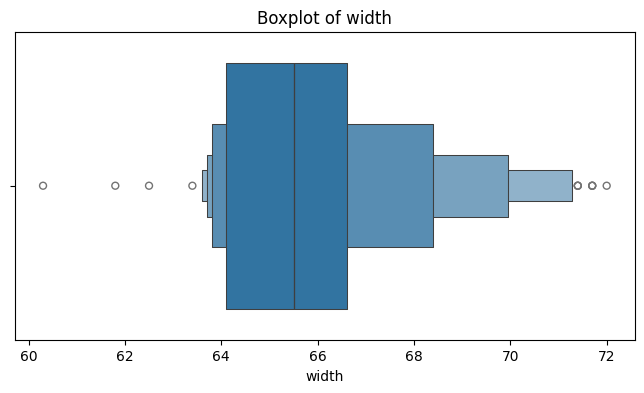

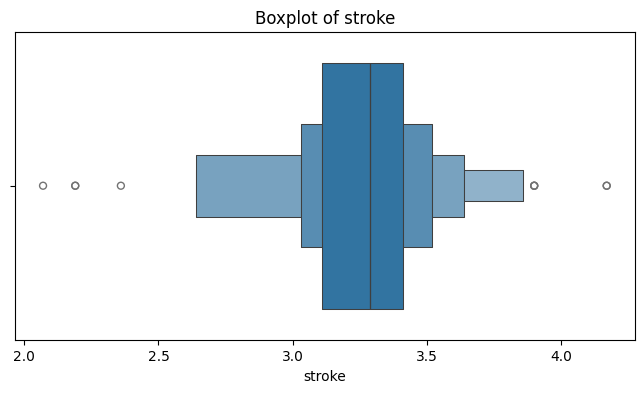

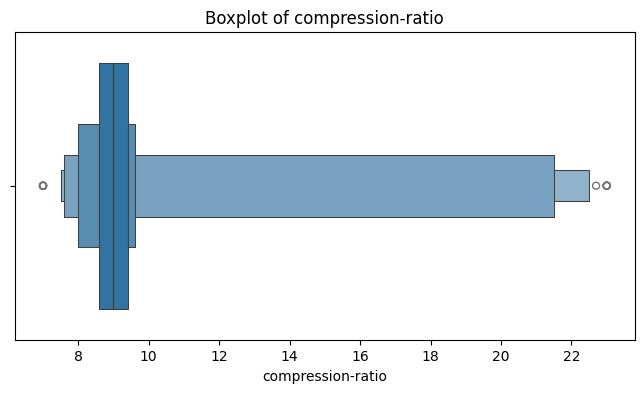

In [40]:
#### Visualize the outliers
## 1. Boxplot
features_to_plot = ['width','stroke','compression-ratio']

for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.boxenplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [41]:
df.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# ### 2. Scatterplot
# for feature in features_to_plot:
#     plt.figure(figsize=(8,4))
#     sns.stripplot(x=df[feature],jitter=True)
#     plt.title(f"Strip Plot of {feature}")
#     # plt.show()

In [43]:
# ### 3. Histogram or KDE plot
# for feature in features_to_plot:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[feature], kde=True)
#     plt.title(f"Histogram and KDE of {feature}")
#     plt.show()

In [44]:
# ### 4. Violin Plot
# for feature in features_to_plot:
#     plt.figure(figsize=(8,4))
#     sns.violinplot(x=df[feature])
#     plt.title(f"Violin Plot of {feature}")
#     plt.show()

- Since your dataset has realistic extreme values (e.g., wide car widths, engine specs), capping (Winsorization) the outliers using IQR bounds is the best first step.

In [45]:
## Import Necessory libraries
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [46]:
for col in ['width','stroke','compression-ratio']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound,upper=upper_bound)
    print(f"capped outliers in {col}")

capped outliers in width
capped outliers in stroke
capped outliers in compression-ratio


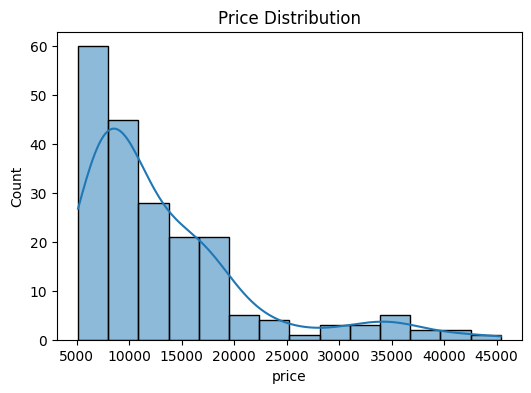

In [47]:
### EDA Quick Plots
plt.figure(figsize=(6,4))
sns.histplot(df['price'],kde=True)
plt.title('Price Distribution')
plt.show()

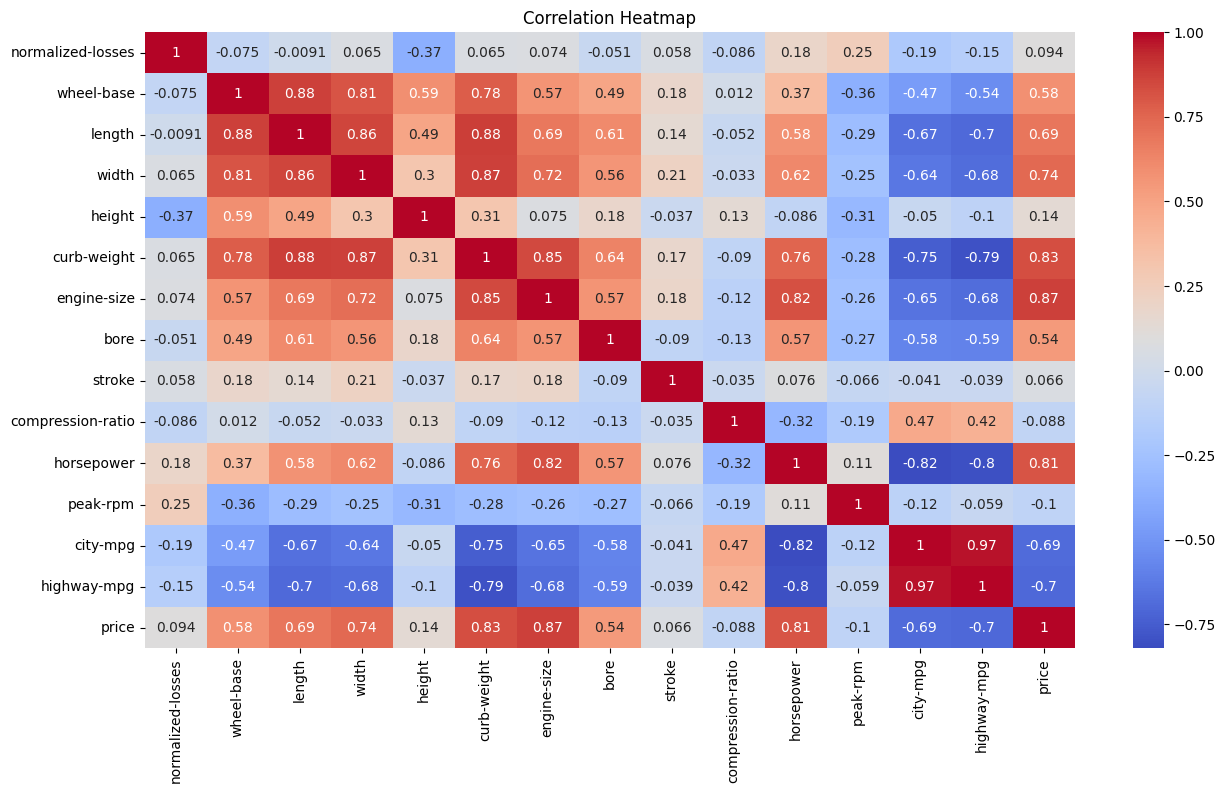

In [48]:
### Price VS Contineous features
plt.figure(figsize=(15,8))
sns.heatmap(df[continuous_features + ['price']].corr(), cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

* Assumptions of Linear Regression
    - Before model Training
        - 01 Colinearity Between Independent and Dependent Features
        - 02 Nomulticolinearity between Indepident features

    - After Model Training
        - 03 Normality of Residuals
        - 04 Homoscedasticity

In [49]:
corr_matrix = df.corr(numeric_only=True)

In [50]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

price                   1.000000
engine-size             0.872335
curb-weight             0.834415
horsepower              0.810500
width                   0.738159
num-of-cylinders        0.708645
length                  0.690628
drive-wheels_rwd        0.637522
wheel-base              0.584642
bore                    0.543154
make_mercedes-benz      0.524953
fuel-system_mpfi        0.509698
engine-type_ohcv        0.394454
make_jaguar             0.332180
make_bmw                0.331607
engine-location_rear    0.331062
make_porsche            0.327029
body-style_hardtop      0.231180
aspiration_turbo        0.179578
body-style_sedan        0.148105
make_volvo              0.147394
height                  0.135486
fuel-system_idi         0.110326
make_audi               0.102938
normalized-losses       0.094366
make_peugot             0.069263
stroke                  0.065933
engine-type_l           0.045151
make_saab               0.044614
num-of-doors            0.042435
make_mercu

- Select the correlation wiht values >= 0.3 0r <= -0.3
- features with |correlation| >= 0.3 and exclude 'price' itself


In [51]:
valid_features = price_corr[price_corr.abs()>=0.3].drop('price')
print(valid_features.sort_values(ascending=False))

engine-size             0.872335
curb-weight             0.834415
horsepower              0.810500
width                   0.738159
num-of-cylinders        0.708645
length                  0.690628
drive-wheels_rwd        0.637522
wheel-base              0.584642
bore                    0.543154
make_mercedes-benz      0.524953
fuel-system_mpfi        0.509698
engine-type_ohcv        0.394454
make_jaguar             0.332180
make_bmw                0.331607
engine-location_rear    0.331062
make_porsche            0.327029
engine-type_ohc        -0.332851
fuel-system_2bbl       -0.497825
drive-wheels_fwd       -0.595979
city-mpg               -0.686571
highway-mpg            -0.704692
Name: price, dtype: float64


- Features with |correlation| < 0.3 may be weak predictors.
- Keep features with correlation >= 0.3 or <= -0.3.
- You can experiment with thresholds (e.g., 0.25, 0.2) if needed.

### Check Multicollinearity Using VIF (Variance Inflation Factor)
- Even if features are correlated with the target, they shouldn’t be highly correlated with each other. That's where VIF helps.
- VIF > 5 indicates moderate multicollinearity
- VIF > 10 indicates severe multicollinearity (should be removed)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [53]:
# keep only the given features
selected_features = [
    'engine-size', 'curb-weight', 'horsepower', 'width', 'num-of-cylinders',
    'length', 'drive-wheels_rwd', 'wheel-base', 'bore', 'make_mercedes-benz',
    'fuel-system_mpfi', 'engine-type_ohcv', 'make_jaguar', 'make_bmw',
    'engine-location_rear', 'make_porsche', 'engine-type_ohc', 'fuel-system_2bbl',
    'drive-wheels_fwd', 'city-mpg', 'highway-mpg'
]

In [54]:
# df is your main dataset
X = df[selected_features]

In [55]:
# add constant for intercept
X_const = add_constant(X)

In [56]:
# calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

In [57]:
vif_df

,Feature,VIF
0,const,5023.263889
1,engine-size,22.249189
2,curb-weight,20.303189
3,horsepower,9.784965
4,width,6.962514
5,num-of-cylinders,10.202167
6,length,11.174174
7,drive-wheels_rwd,8.920885
8,wheel-base,7.243841
9,bore,4.018672


In [61]:
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df['feature'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_df.sort_values(by='VIF',ascending=False)

In [62]:
# Drop target from features if preasent 
X = df[selected_features] # your current correlation filtered features

In [63]:
threshold = 5
while True:
    vif_df = calculate_vif(X)
    max_vif = vif_df['VIF'].max()

    if max_vif > threshold:
        drop_feature = vif_df.iloc[0]['feature']
        print(f"Dropping: {drop_feature} (VIF={max_vif:.2f})")
        
        X = X.drop(columns=[drop_feature])

    else:
        break

print("\n Final Features:\n ",X.columns.tolist())
print("]nFinal VIF table: \n", calculate_vif(X))

Dropping: width (VIF=2543.14)
Dropping: length (VIF=2084.97)
Dropping: wheel-base (VIF=835.07)
Dropping: highway-mpg (VIF=592.56)
Dropping: bore (VIF=249.38)
Dropping: engine-size (VIF=132.39)
Dropping: num-of-cylinders (VIF=91.11)
Dropping: curb-weight (VIF=68.99)
Dropping: horsepower (VIF=19.19)
Dropping: city-mpg (VIF=18.31)
Dropping: drive-wheels_fwd (VIF=6.30)

 Final Features:
  ['drive-wheels_rwd', 'make_mercedes-benz', 'fuel-system_mpfi', 'engine-type_ohcv', 'make_jaguar', 'make_bmw', 'engine-location_rear', 'make_porsche', 'engine-type_ohc', 'fuel-system_2bbl']
]nFinal VIF table: 
                 feature       VIF
7          make_porsche  4.098808
6  engine-location_rear  4.052623
2      fuel-system_mpfi  2.763250
8       engine-type_ohc  2.543467
0      drive-wheels_rwd  2.232439
9      fuel-system_2bbl  1.831244
3      engine-type_ohcv  1.544138
1    make_mercedes-benz  1.364988
5              make_bmw  1.197617
4           make_jaguar  1.084427


In [64]:
df.shape

(201, 60)